In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing some tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [3]:
df_train = pd.read_csv('/Users/frankfeng/Desktop/Responsible Data Science/Project/Train_rev1.zip', compression='zip', header=0, sep=',', quotechar='"')

In [56]:
df_train.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [4]:
df_train.tail()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
244763,72705211,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk
244767,72705235,Accountant,This entrepreneurial and growing private equit...,Hitchin,Hitchin,NaN,permanent,NaN,Teaching Jobs,"40-45,000",42500,hays.co.uk


# Now Some EDA Part (Data Exploration)

In [4]:
df_train.describe()

,Id,SalaryNormalized
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


# Now Check missing values

In [45]:
df_train.isna().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

# Now Check for string label 

In [46]:
for label,content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Title
FullDescription
LocationRaw
LocationNormalized
ContractType
ContractTime
Company
Category
SalaryRaw
SourceName


# Now Check for numerical label

In [47]:
for label,content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
SalaryNormalized


# This will turn all of the string value into category values

In [4]:
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()

# Now Filling missing values

In [6]:
for label,content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_train[label+"is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add+1
        df_train[label] = pd.Categorical(content).codes+1

In [5]:
unique_category_mappings = {}

for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Handle missing values
        df_train[label + "_is_missing"] = pd.isnull(content)
        df_train[label] = content.astype('category').cat.as_ordered()
        # Create a mapping for the unique categories
        category_mapping = {category: code + 1 for code, category in enumerate(df_train[label].cat.categories)}
        # Store the mapping only if the label has 29 unique kinds
        if len(category_mapping) == 29:
            unique_category_mappings[label] = category_mapping
        # Convert categories to numerical codes
        df_train[label] = df_train[label].cat.codes + 1

In [15]:
print(unique_category_mappings)

{'Category': {'Accounting & Finance Jobs': 1, 'Admin Jobs': 2, 'Charity & Voluntary Jobs': 3, 'Consultancy Jobs': 4, 'Creative & Design Jobs': 5, 'Customer Services Jobs': 6, 'Domestic help & Cleaning Jobs': 7, 'Energy, Oil & Gas Jobs': 8, 'Engineering Jobs': 9, 'Graduate Jobs': 10, 'HR & Recruitment Jobs': 11, 'Healthcare & Nursing Jobs': 12, 'Hospitality & Catering Jobs': 13, 'IT Jobs': 14, 'Legal Jobs': 15, 'Logistics & Warehouse Jobs': 16, 'Maintenance Jobs': 17, 'Manufacturing Jobs': 18, 'Other/General Jobs': 19, 'PR, Advertising & Marketing Jobs': 20, 'Part time Jobs': 21, 'Property Jobs': 22, 'Retail Jobs': 23, 'Sales Jobs': 24, 'Scientific & QA Jobs': 25, 'Social work Jobs': 26, 'Teaching Jobs': 27, 'Trade & Construction Jobs': 28, 'Travel Jobs': 29}}


# Now Check Missing Values in Dataset

In [50]:
df_train.isna().sum()

Id                              0
Title                           0
FullDescription                 0
LocationRaw                     0
LocationNormalized              0
ContractType                    0
ContractTime                    0
Company                         0
Category                        0
SalaryRaw                       0
SalaryNormalized                0
SourceName                      0
Titleis_missing                 0
FullDescriptionis_missing       0
LocationRawis_missing           0
LocationNormalizedis_missing    0
ContractTypeis_missing          0
ContractTimeis_missing          0
Companyis_missing               0
Categoryis_missing              0
SalaryRawis_missing             0
SourceNameis_missing            0
dtype: int64

# Now Data Visualization Part

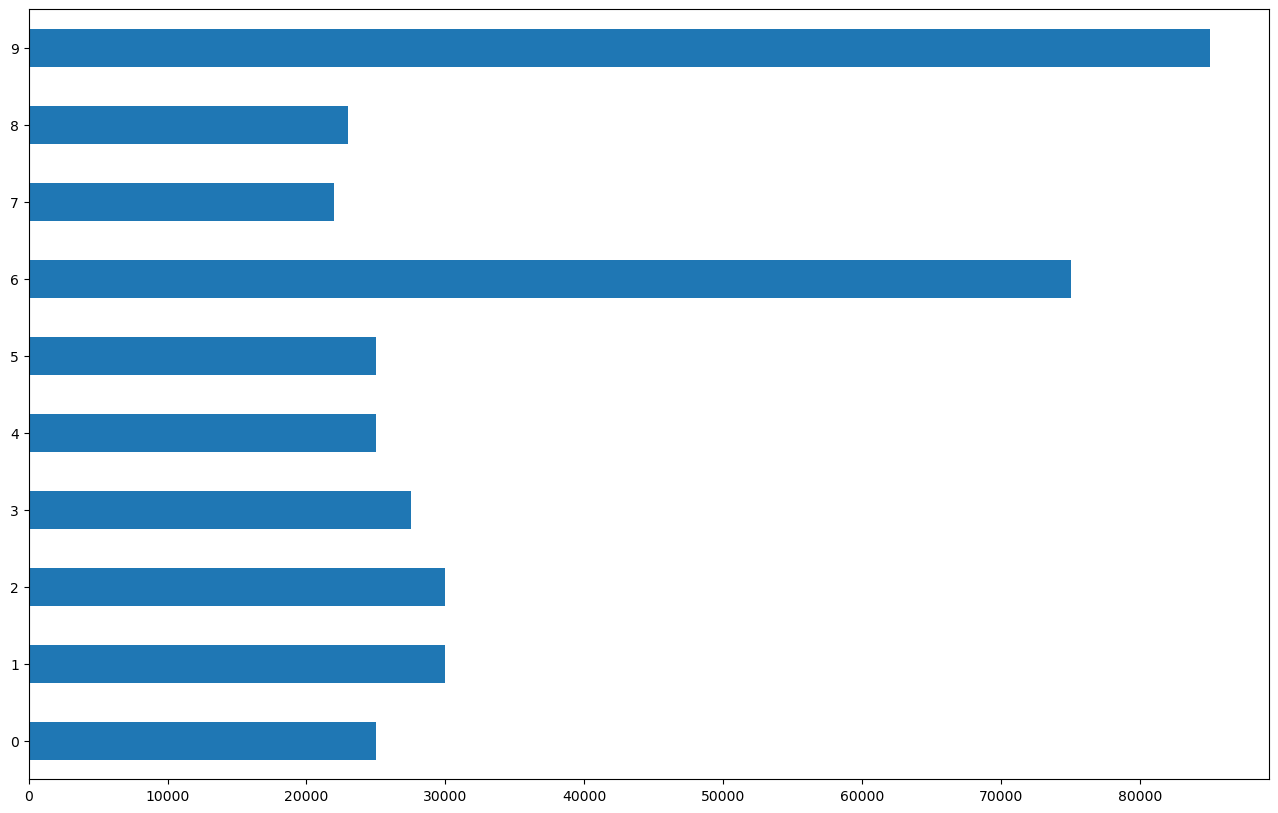

In [14]:
ms = df_train["SalaryNormalized"][:10].plot.barh(figsize=(16,10))

<Axes: >

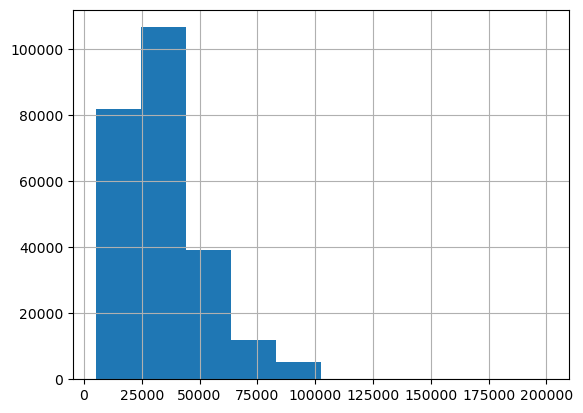

In [15]:
df_train["SalaryNormalized"].hist()

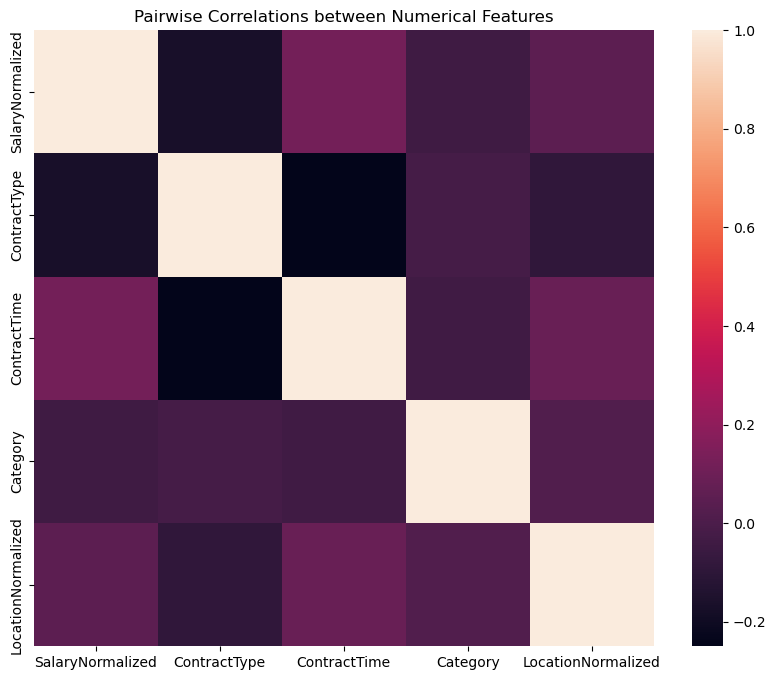

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ["SalaryNormalized"]
categorical_features = ["ContractType", "ContractTime", "Category", "LocationNormalized"]

for feature in categorical_features:
    df_train[feature] = df_train[feature].astype('category').cat.codes

correlation_matrix = df_train[numeric_features + categorical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f")
plt.title('Pairwise Correlations between Numerical Features')
plt.show()


/Users/frankfeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/frankfeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
/Users/frankfeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/frankfeng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=den

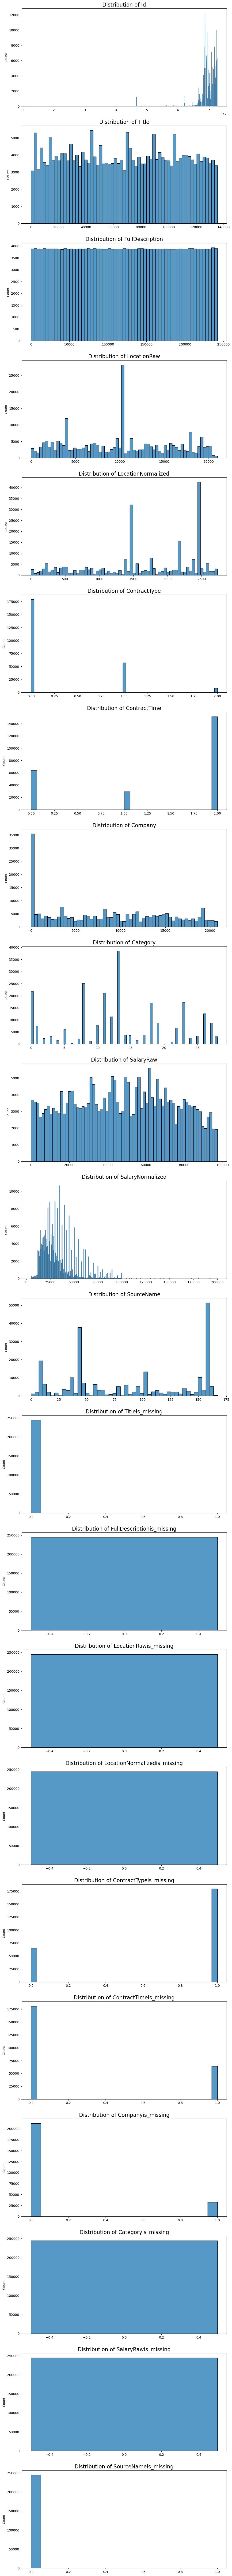

In [22]:
fig, axes = plt.subplots(nrows=len(df_train.columns), ncols=1, figsize=(10, 5*len(df_train.columns)))

for i, col in enumerate(df_train.columns):
    sns.histplot(df_train[col], ax=axes[i], kde=True if df_train[col].dtype == 'float' else False)
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    plt.tight_layout()

plt.show()

# Now copy the train set dataset

In [7]:
df_copy = df_train.copy()

In [17]:
df_copy.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,...,Title_is_missing,FullDescription_is_missing,LocationRaw_is_missing,LocationNormalized_is_missing,ContractType_is_missing,ContractTime_is_missing,Company_is_missing,Category_is_missing,SalaryRaw_is_missing,SourceName_is_missing
0,12612628,39227,68301,5178,751,0,2,7758,9,21344,...,False,False,False,False,True,False,False,False,False,False
1,12612830,121388,196351,6881,987,0,2,7758,9,32427,...,False,False,False,False,True,False,False,False,False,False
2,12612844,73486,117824,7630,1069,0,2,7758,9,21539,...,False,False,False,False,True,False,False,False,False,False
3,12613049,39228,68300,17183,2310,0,2,7758,9,31840,...,False,False,False,False,True,False,False,False,False,False
4,12613647,85435,157839,17183,2310,0,2,7758,9,21344,...,False,False,False,False,True,False,False,False,False,False


In [16]:
df_copy.tail()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,...,Titleis_missing,FullDescriptionis_missing,LocationRawis_missing,LocationNormalizedis_missing,ContractTypeis_missing,ContractTimeis_missing,Companyis_missing,Categoryis_missing,SalaryRawis_missing,SourceNameis_missing
244763,72705211,123566,159877,17363,2329,0,1,0,27,59081,...,False,False,False,False,True,False,True,False,False,False
244764,72705212,123556,159879,17363,2329,0,1,0,27,59081,...,False,False,False,False,True,False,True,False,False,False
244765,72705213,36446,159864,17363,2329,0,1,0,27,59081,...,False,False,False,False,True,False,True,False,False,False
244766,72705216,103002,159865,19775,2643,0,1,0,27,59104,...,False,False,False,False,True,False,True,False,False,False
244767,72705235,3379,211800,8334,1175,0,2,0,27,54848,...,False,False,False,False,True,False,True,False,False,False


# Now Split the data into X and y

In [8]:
X = df_copy.drop(columns=["SalaryNormalized"],axis=1)
y = df_copy["SalaryNormalized"]

# Now Call Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Now build Model

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
model = RandomForestRegressor(n_jobs=-1)

# Now Fit The Model

In [13]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

# Evaluation of the model
Evaluate model using mean absolute error

In [28]:
df_copy['Category']

0          9
1          9
2          9
3          9
4          9
          ..
244763    27
244764    27
244765    27
244766    27
244767    27
Name: Category, Length: 244768, dtype: int8

In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(X, y, model, categories):
    results = []
    for category in categories:
        X_sub = X[X['Category'] == category]
        y_sub = y[X['Category'] == category]
        y_pred = model.predict(X_sub)
        
        mae = mean_absolute_error(y_sub, y_pred)
        rmse = mean_squared_error(y_sub, y_pred, squared=False)
        r2 = r2_score(y_sub, y_pred)
        
        results.append({
            'Category': category,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })
    
    return pd.DataFrame(results)

categories = df_train['Category'].unique()

results = evaluate_model(X_train, y_train, model, categories)
results = results.sort_values(by='MAE')
results = results.reset_index()
category_mapping = unique_category_mappings['Category']
reversed_mapping = {v: k for k, v in category_mapping.items()}
results['Category'] = results['Category'].map(reversed_mapping)
results

,index,Category,MAE,RMSE,R2
0,28,Part time Jobs,344.779906,1346.681591,0.954594
1,24,Maintenance Jobs,372.431375,1533.815561,0.977128
2,5,Hospitality & Catering Jobs,407.629616,1554.928127,0.976254
3,6,IT Jobs,472.506930,1907.029333,0.989041
4,17,Retail Jobs,494.088187,1862.230578,0.986299
5,10,Manufacturing Jobs,513.796468,1854.718801,0.982014
6,7,Customer Services Jobs,530.624658,1542.566443,0.969698
7,1,HR & Recruitment Jobs,551.459380,1695.699552,0.986923
8,15,Admin Jobs,553.390316,1899.212266,0.960811
9,0,Engineering Jobs,601.788077,1972.705272,0.981877


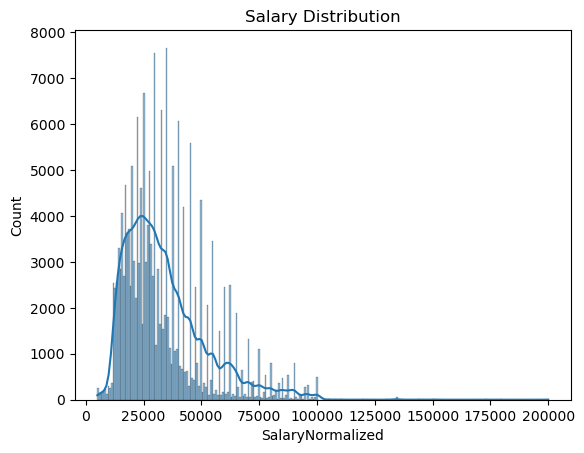

Mean Salary: 34123.85128775003
Median Salary: 30000.0


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_train, kde=True)
plt.xlabel("SalaryNormalized")
plt.title("Salary Distribution")
plt.show()

mean_salary = y_train.mean()
median_salary = y_train.median()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np

def evaluate_fairness(X, y, model, categories, positive_threshold):
    results = []
    for category in categories:
        # Subset data
        X_sub = X[X['Category'] == category]
        y_sub = y[X['Category'] == category]
        
        # Make predictions
        y_pred = model.predict(X_sub)
        y_pred_binary = (y_pred > positive_threshold).astype(int)
        y_sub_binary = (y_sub > positive_threshold).astype(int)

        # Calculate metrics
        precision = precision_score(y_sub_binary, y_pred_binary, zero_division=1)
        recall = recall_score(y_sub_binary, y_pred_binary)
        f1 = f1_score(y_sub_binary, y_pred_binary)
        accuracy = accuracy_score(y_sub_binary, y_pred_binary)
        tn, fp, fn, tp = confusion_matrix(y_sub_binary, y_pred_binary).ravel()
        tpr = tp / (tp + fn)  # True Positive Rate
        fpr = fp / (fp + tn)  # False Positive Rate

        results.append({
            'Category': category,
            'Precision': precision,
            'Recall': recall,
            'F1': f1,
            'Accuracy': accuracy,
            'True Positive Rate': tpr,
            'False Positive Rate': fpr
        })
    
    return pd.DataFrame(results)

positive_threshold = 34123.85128775003

categories = df_train['Category'].unique()

fairness_results = evaluate_fairness(X_test, y_test, model, categories, positive_threshold)
fairness_results.sort_values(by='True Positive Rate', ascending=False, inplace=True)
category_mapping = unique_category_mappings['Category']
reversed_mapping = {v: k for k, v in category_mapping.items()}
fairness_results['Category'] = fairness_results['Category'].map(reversed_mapping)
fairness_results

fairness_results

,Category,Precision,Recall,F1,Accuracy,True Positive Rate,False Positive Rate
25,Domestic help & Cleaning Jobs,0.400000,1.000000,0.571429,0.961039,1.000000,0.040000
6,IT Jobs,0.984158,0.986111,0.985134,0.979761,0.986111,0.033733
16,Legal Jobs,0.970840,0.984348,0.977547,0.973550,0.984348,0.041667
17,Retail Jobs,0.958991,0.979066,0.968924,0.976407,0.979066,0.025194
0,Engineering Jobs,0.950793,0.973293,0.961911,0.964392,0.973293,0.043251
2,Accounting & Finance Jobs,0.945415,0.971942,0.958495,0.958178,0.971942,0.055412
21,"PR, Advertising & Marketing Jobs",0.951009,0.971541,0.961165,0.963504,0.971541,0.043478
1,HR & Recruitment Jobs,0.942667,0.968493,0.955405,0.967115,0.968493,0.033673
4,Other/General Jobs,0.946991,0.966197,0.956497,0.963997,0.966197,0.037529
19,"Energy, Oil & Gas Jobs",0.954054,0.964481,0.959239,0.945155,0.964481,0.093923


In [22]:
mae_rand_forest = mean_absolute_error(y_test,y_pred)

In [23]:
mae_rand_forest

1784.703970290234

In [13]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
mean_cv_score = np.mean(-cv_scores)
print(f"Cross-validated MAE: {mean_cv_score:.2f}")

Cross-validated MAE: 1920.75


In [15]:
print(abs(cv_scores))

[1843.24434552 1934.95164483 1939.83430287 1945.5506624  1940.17915702]


In [16]:
pd.set_option('display.max_columns',None)
X_train = X_train.astype(int)
X_test.iloc[:1,:][['Company', 'Category','SalaryRaw']]

,Company,Category,SalaryRaw
197243,2533,1,88251


In [11]:
import shap
explainer = shap.Explainer(model, X_train[['Company', 'Category','SalaryRaw']])

In [14]:
import shap
explainer = shap.Explainer(model, X_train[['Id','Title','FullDescription','LocationRaw','LocationNormalized','ContractType','ContractTime','Company', 'Category','SalaryRaw','SourceName']])

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[:1,:][['Company', 'Category','SalaryRaw']])

: 

In [ ]:
shap.summary_plot(shap_values, X_test[['Id','Title','FullDescription','LocationRaw','LocationNormalized','ContractType','ContractTime','Company', 'Category','SalaryRaw','SourceName']], plot_type='bar')

# Now Some Hyerparameter tuning with RandomizedSearchCV

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
np.random.seed(42)
grid = {
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
    "max_samples":[10000,12000,15000,20000]
}

In [39]:
rs_model = RandomizedSearchCV(
RandomForestRegressor(n_jobs=-1,
                     random_state=42),
                    param_distributions = grid,
                     n_iter=5,
                    cv=5,
                    verbose=True)

# Now Fit RandomizedSearchCV Model

In [40]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/frankfeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/frankfeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/frankfeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000, 12000, 15000,
                                                        20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [41]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 12000,
 'max_features': 0.5,
 'max_depth': None}

# NowChoose the best performance on the model

In [42]:
y_preds_rs = rs_model.predict(X_test)

# Evaluation of this model
Evaluate model using mean absolute error

In [43]:
mae_hyp = mean_absolute_error(y_test,y_preds_rs)

In [44]:
mae_hyp,mae_rand_forest

(4726.8647237056075, 1784.2459605830827)

# Make predictions

# Now Importing test data

In [45]:
df_test = pd.read_csv('/Users/frankfeng/Desktop/Responsible Data Science/Project/Test_rev1.zip', compression='zip', header=0, sep=',', quotechar='"')

# Now Check for missing values on df_test dataset

In [46]:
df_test.isna().sum()

Id                        0
Title                     0
FullDescription           0
LocationRaw               0
LocationNormalized        0
ContractType          89450
ContractTime          31761
Company               16261
Category                  0
SourceName                0
dtype: int64

In [47]:
df_test.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SourceName
0,11888454,Business Development Manager,The Company: Our client is a national training...,"Tyne Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Teaching Jobs,cv-library.co.uk
1,11988350,Internal Account Manager,The Company: Founded in **** our client is a U...,"Tyne and Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Consultancy Jobs,cv-library.co.uk
2,12612558,Engineering Systems Analysts,Engineering Systems Analysts Surrey ****K Loca...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk
3,12613014,CIS Systems Engineering Consultant,CIS Systems Engineering Consultant Bristol So...,"Bristol, South West, South West",Bristol,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk
4,22454872,CNC Miller / Programmer Fanac,"CNC Miller / Programmer Fanac Fleet, Hampshire...","Fleet, Hampshire",Fleet,NaN,permanent,Gregory Martin International,Manufacturing Jobs,cv-library.co.uk


# Now Check for string label

In [48]:
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Title
FullDescription
LocationRaw
LocationNormalized
ContractType
ContractTime
Company
Category
SourceName


# Now Check for numerical label

In [49]:
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id


# This will turn all of the string value into category values

In [50]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

# Now Filling missing values on test Dataset

In [51]:
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_test[label+"is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add+1
        df_test[label] = pd.Categorical(content).codes+1

In [52]:
X_test.shape,y_test.shape  

((61192, 21), (61192,))

# Now Reshape X_train & df_test

In [53]:
set(X_train.columns)-set(df_test.columns)

{'SalaryRaw', 'SalaryRawis_missing'}

In [54]:
df_test["SalaryRaw"] = False
df_test["SalaryRawis_missing"] = False

In [55]:
X_train.shape,df_test.shape

((183576, 21), (122463, 21))

# Now Make predictions

In [ ]:
y_preds = model.predict(df_test)

# Format predictions into the same format Kaggle is after

In [ ]:
df_preds = pd.DataFrame()

In [ ]:
df_preds["Id"] = df_test["Id"]
df_preds["SalaryNormalized"] = y_preds

In [ ]:
df_preds.head()

In [ ]:
df_preds.to_csv(".//Submission.csv",index=False)

# Now Find feature importance of our best model

In [ ]:
model.feature_importances_

# Helper function for plotting feature importance

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

# Now Plot The Data

In [ ]:
plot_features(X_train.columns,model.feature_importances_)

In [ ]:
df_copy["SalaryRaw"].value_counts()